<a href="https://colab.research.google.com/github/Prishn3113/Codsoft_DS_Internship/blob/main/TitanicSurvival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic Survival Predication**

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
df=pd.read_csv(r'/content/Titanic dataset.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  100 non-null    int64  
 1   Survived     100 non-null    int64  
 2   Pclass       100 non-null    int64  
 3   Name         100 non-null    object 
 4   Sex          100 non-null    object 
 5   Age          78 non-null     float64
 6   SibSp        100 non-null    int64  
 7   Parch        100 non-null    int64  
 8   Ticket       100 non-null    object 
 9   Fare         100 non-null    float64
 10  Cabin        20 non-null     object 
 11  Embarked     99 non-null     object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.5+ KB


In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,2,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,1,2,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,0,2,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,100.000000,100.000000,100.000000,78.000000,100.000000,100.000000,100.000000
mean,50.500000,0.410000,2.400000,27.465769,0.730000,0.440000,29.517625
std,29.011492,0.494311,0.816497,15.278878,1.179411,0.967346,40.972905
min,1.000000,0.000000,1.000000,0.830000,0.000000,0.000000,7.225000
25%,25.750000,0.000000,2.000000,18.250000,0.000000,0.000000,8.050000
50%,50.500000,0.000000,3.000000,26.000000,0.000000,0.000000,15.675000
75%,75.250000,1.000000,3.000000,34.750000,1.000000,0.000000,32.134375
max,100.000000,1.000000,3.000000,71.000000,5.000000,5.000000,263.000000


In [ ]:
df.isnull().sum()#or df.isna().sum()


PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            22
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin          80
Embarked        1
dtype: int64

In [ ]:
df.shape

(100, 12)

In [ ]:
df.drop('PassengerId',inplace=True,axis=1) #Data Cleaning
df['Cabin'].count()/df.shape[0]

0.2

In [ ]:
df.drop('Cabin',inplace=True,axis=1)#because there is more than 70% empty values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  100 non-null    int64  
 1   Pclass    100 non-null    int64  
 2   Name      100 non-null    object 
 3   Sex       100 non-null    object 
 4   Age       78 non-null     float64
 5   SibSp     100 non-null    int64  
 6   Parch     100 non-null    int64  
 7   Ticket    100 non-null    object 
 8   Fare      100 non-null    float64
 9   Embarked  99 non-null     object 
dtypes: float64(2), int64(4), object(4)
memory usage: 7.9+ KB


In [ ]:
df['Age'].count()/df.shape[0]

0.78

In [ ]:
df.dropna(subset=['Age','Embarked'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77 entries, 0 to 99
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  77 non-null     int64  
 1   Pclass    77 non-null     int64  
 2   Name      77 non-null     object 
 3   Sex       77 non-null     object 
 4   Age       77 non-null     float64
 5   SibSp     77 non-null     int64  
 6   Parch     77 non-null     int64  
 7   Ticket    77 non-null     object 
 8   Fare      77 non-null     float64
 9   Embarked  77 non-null     object 
dtypes: float64(2), int64(4), object(4)
memory usage: 6.6+ KB


In [ ]:
pd.set_option('display.max_columns',None)  #passenger on the Titanic survived
pd.set_option('display.max_rows',None)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,S
6,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,C
10,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,S


from matplotlib import pyplot as plt
df['Survived'].plot(kind='hist', bins=20, title='Survived')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Pclass'].plot(kind='hist', bins=20, title='Pclass')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['SibSp'].plot(kind='hist', bins=20, title='SibSp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Embarked').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Survived', y='Pclass', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Pclass', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Age', y='SibSp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='SibSp', y='Parch', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Survived'].plot(kind='line', figsize=(8, 4), title='Survived')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Pclass'].plot(kind='line', figsize=(8, 4), title='Pclass')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['SibSp'].plot(kind='line', figsize=(8, 4), title='SibSp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Embarked'].value_counts()
    for x_label, grp in df.groupby('Sex')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Sex')
_ = plt.ylabel('Embarked')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Survived', y='Sex', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Embarked'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Survived', y='Embarked', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Pclass', y='Sex', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Embarked'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Pclass', y='Embarked', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
df['Survived'].value_counts()

Survived
0    47
1    30
Name: count, dtype: int64

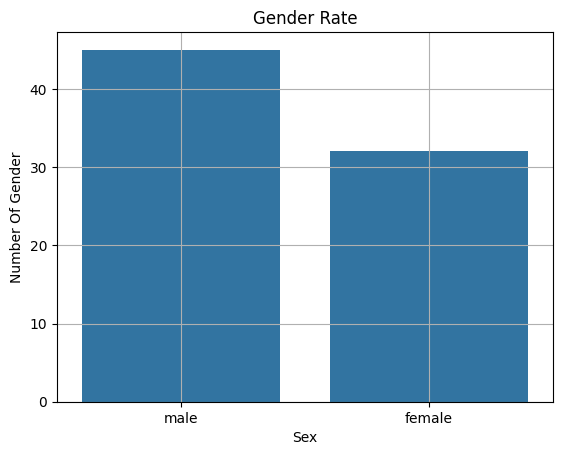

In [ ]:
sns.countplot(x='Sex',data=df)
plt.ylabel('Number Of Gender')
plt.title('Gender Rate')
plt.grid()
plt.show()

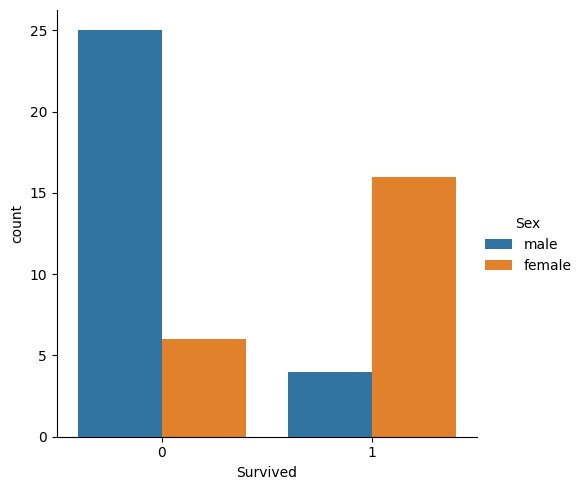

In [ ]:
ind=df[df['Age']>30].index
df_1=df.drop(ind,axis=0)
sns.catplot(x='Survived',hue='Sex',kind='count',data=df_1)
plt.show()

In [ ]:
df.groupby('Survived')['Sex'].value_counts()

Survived  Sex   
0         male      39
          female     8
1         female    24
          male       6
Name: count, dtype: int64

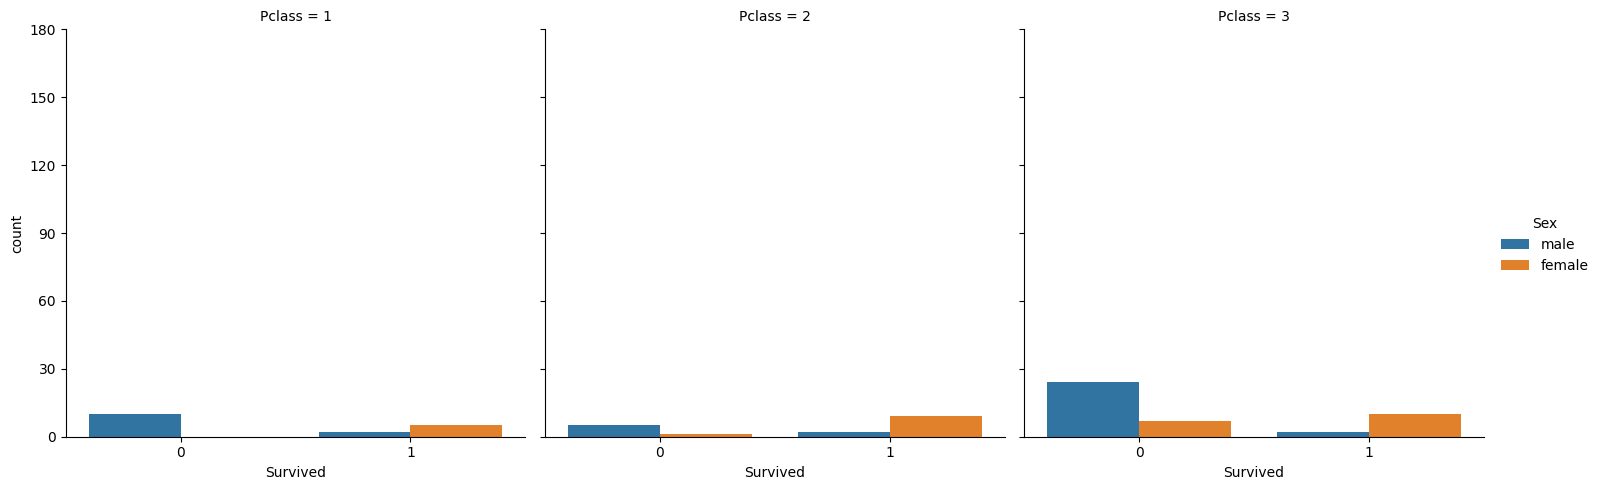

In [ ]:
sns.catplot(x='Survived',hue='Sex',col='Pclass',data=df,kind='count')
plt.yticks(np.arange(0,200,30))
plt.show()

In [ ]:
df.groupby(['Survived','Pclass'])['Sex'].value_counts()

Survived  Pclass  Sex   
0         1       male      10
          2       male       5
                  female     1
          3       male      24
                  female     7
1         1       female     5
                  male       2
          2       female     9
                  male       2
          3       female    10
                  male       2
Name: count, dtype: int64

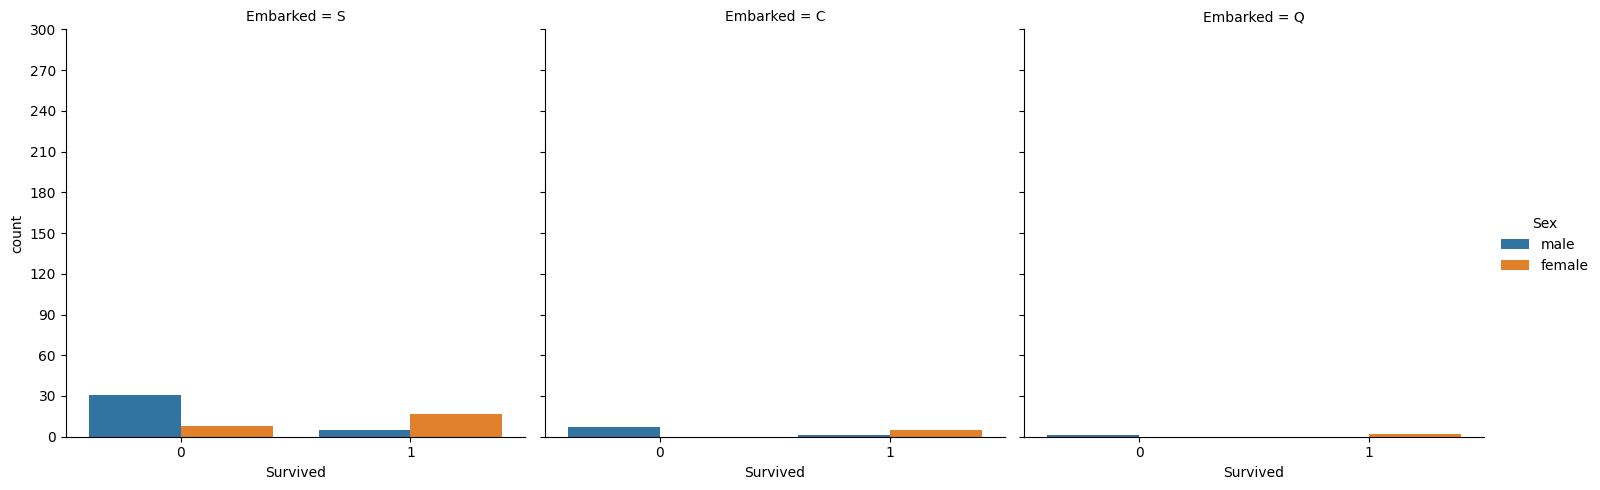

In [ ]:
sns.catplot(x='Survived',hue='Sex',col='Embarked',data=df,kind='count')
plt.yticks(np.arange(0,330,30))
plt.show()

In [ ]:
df.groupby(['Survived','Embarked'])['Sex'].value_counts()

Survived  Embarked  Sex   
0         C         male       7
          Q         male       1
          S         male      31
                    female     8
1         C         female     5
                    male       1
          Q         female     2
          S         female    17
                    male       5
Name: count, dtype: int64

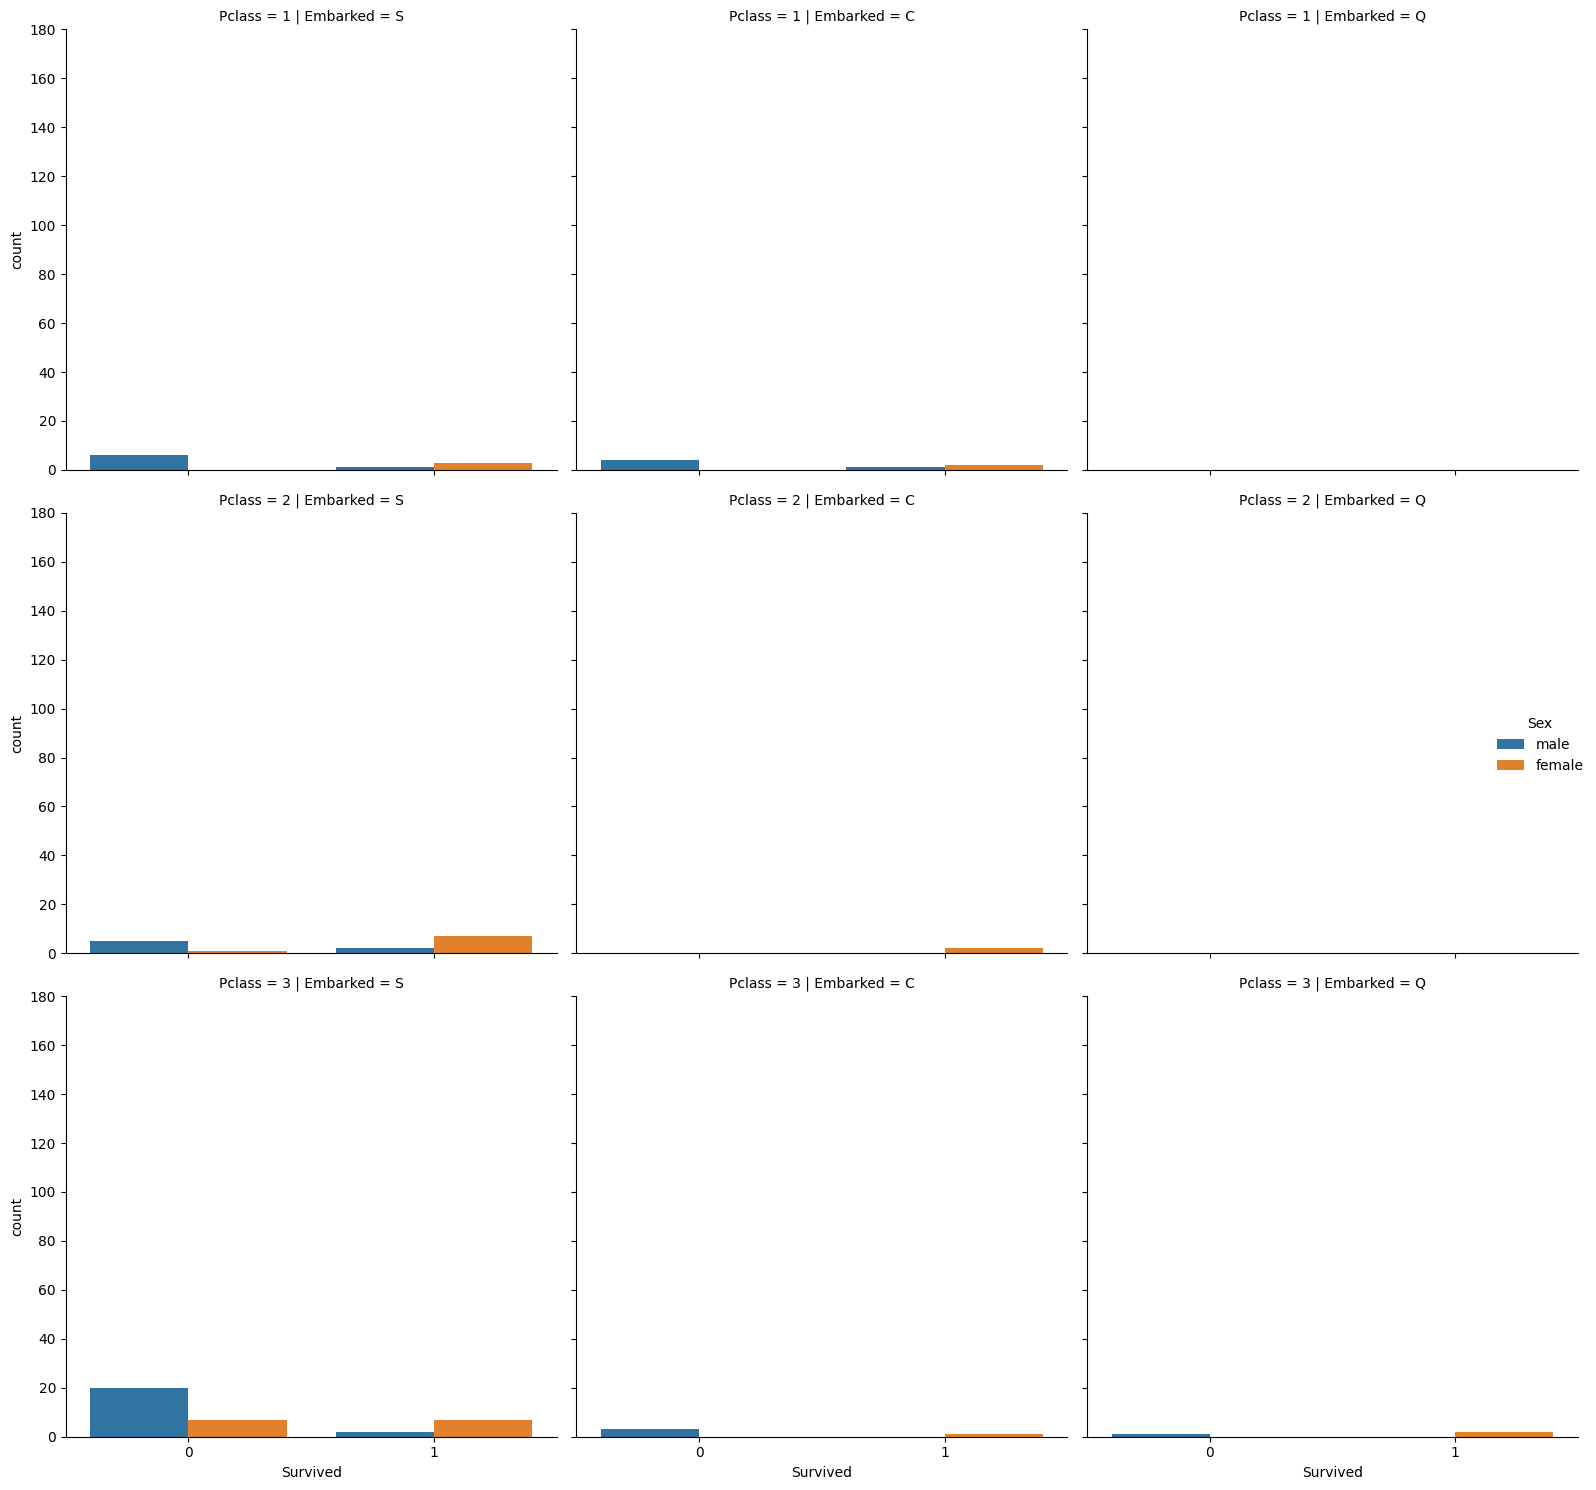

In [ ]:
sns.catplot(x='Survived',hue='Sex',col='Embarked',row='Pclass',data=df,kind='count')
plt.yticks(np.arange(0,190,20))
plt.tight_layout()
plt.show()

In [ ]:
df.groupby(['Survived','Embarked','Pclass'])['Sex'].value_counts()

Survived  Embarked  Pclass  Sex   
0         C         1       male       4
                    3       male       3
          Q         3       male       1
          S         1       male       6
                    2       male       5
                            female     1
                    3       male      20
                            female     7
1         C         1       female     2
                            male       1
                    2       female     2
                    3       female     1
          Q         3       female     2
          S         1       female     3
                            male       1
                    2       female     7
                            male       2
                    3       female     7
                            male       2
Name: count, dtype: int64

In [ ]:
df['Sex'].value_counts()


Sex
male      45
female    32
Name: count, dtype: int64

In [ ]:
df['Pclass'].value_counts()

Pclass
3    43
1    17
2    17
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ['Sex', 'Pclass']
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,2,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,1,2,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,0,2,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [ ]:
X = df.drop(columns = ['Pclass','Survived'],axis=1)
Y = df['Survived']
print(X)


                                                 Name  Sex    Age  SibSp  \
0                             Braund, Mr. Owen Harris    1  22.00      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.00      1   
2                              Heikkinen, Miss. Laina    0  26.00      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.00      1   
4                            Allen, Mr. William Henry    1  35.00      0   
6                             McCarthy, Mr. Timothy J    1  54.00      0   
7                      Palsson, Master. Gosta Leonard    1   2.00      3   
8   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)    0  27.00      0   
9                 Nasser, Mrs. Nicholas (Adele Achem)    0  14.00      1   
10                    Sandstrom, Miss. Marguerite Rut    0   4.00      1   
11                           Bonnell, Miss. Elizabeth    0  58.00      0   
12                     Saundercock, Mr. William Henry    1  20.00      0   
13          

In [ ]:
print(Y)

0     0
1     1
2     1
3     1
4     0
6     0
7     0
8     1
9     1
10    1
11    1
12    0
13    0
14    0
15    1
16    0
18    0
20    0
21    1
22    1
23    1
24    0
25    1
27    0
30    0
33    0
34    0
35    0
37    0
38    0
39    1
40    0
41    0
43    1
44    1
49    0
50    0
51    0
52    1
53    1
54    0
56    1
57    0
58    1
59    0
60    0
62    0
63    0
66    1
67    0
68    1
69    0
70    0
71    0
72    0
73    0
74    1
75    0
78    1
79    1
80    0
81    1
83    0
84    1
85    1
86    0
88    1
89    0
90    0
91    0
92    0
93    0
94    0
96    0
97    1
98    1
99    0
Name: Survived, dtype: int64


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77 entries, 0 to 99
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  77 non-null     int64  
 1   Pclass    77 non-null     int64  
 2   Name      77 non-null     object 
 3   Sex       77 non-null     int64  
 4   Age       77 non-null     float64
 5   SibSp     77 non-null     int64  
 6   Parch     77 non-null     int64  
 7   Ticket    77 non-null     object 
 8   Fare      77 non-null     float64
 9   Embarked  77 non-null     object 
dtypes: float64(2), int64(5), object(3)
memory usage: 8.7+ KB


In [ ]:
df.astype({'Age':'int','Fare':'int'}).dtypes

Survived     int64
Pclass       int64
Name        object
Sex          int64
Age          int64
SibSp        int64
Parch        int64
Ticket      object
Fare         int64
Embarked    object
dtype: object